<img src="https://designguide.ku.dk/download/co-branding/ku_logo_uk_h.png" alt="University logo" width="300" align="right"/>

Modified teaching materials from Scientific programming (7.5 ECTS) of MSc Programme in IT and Cognition. The lecturer is Ali Basirat (alib@hum.ku.dk). 


## Pandas

 * `numpy` arrays or matrices are powerful tools.
 * `pandas` adds more functionalities to the structured data in `numpy`. For example:
     + it allows for working with missing values 缺省值处理，缺失值处理  
     + it allows for indexing rows and columns with string indices  字符串索引  
     + it allows us to access the data as with spreadsheets (e.g., Calc, and Excel)  表格处理 
     + it provides tools for statistical data analysis 统计方法   

pandas可以视为程序版本的excel

## Pandas

* A Python package that allows us to do statistical data analysis.
* The package name stands for both *Panel Data*, and *Python Data Analysis*

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/6990634-panda-hug.jpg"/> 

In [2]:
import pandas as pd

print(pd.__version__)

2.1.1


### Main data types

There are two main types of data in Pandas:

 * Series
 * Dataframe

### Pandas series

Generalized version of one-dimensional `numpy` array.

The main difference is the explicit definition of an index.

In Numpy, the values are accessed using an implicitly defined integer index.

In Pandas, we can explicitly define an index, composed by, e.g., strings. 

For instance:

In [3]:
import numpy as np
daysoftheweek_productivity = np.array([0.5,0.7,0.95,0.85,0.65,0.1,0.05])
daysoftheweek_productivity

array([0.5 , 0.7 , 0.95, 0.85, 0.65, 0.1 , 0.05])

In [4]:
# index 默认是指行的index，所以index默认构成一个列
# 输入进来的数据也默认是一列，创建 series，通过数组创建series，numpy转pandas
# 添加行名称，行index，行索引，添加索引
daysoftheweek_productivity_series = pd.Series (daysoftheweek_productivity, index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']) 
daysoftheweek_productivity_series

Mon    0.50
Tue    0.70
Wed    0.95
Thu    0.85
Fri    0.65
Sat    0.10
Sun    0.05
dtype: float64

A Pandas series can be seen as a specialized Python dictionary.  
We can create a series from a dictionary. For example:

In [5]:
daysoftheweek_productivity_series = pd.Series({ # 通过字典创建series
'Mon': 0.5,
'Tue': 0.7,
'Wed': 0.95,
'Thu': 0.85,
'Fri': 0.65,
'Sat': 0.1,
'Sun': 0.05})
daysoftheweek_productivity_series

Mon    0.50
Tue    0.70
Wed    0.95
Thu    0.85
Fri    0.65
Sat    0.10
Sun    0.05
dtype: float64

### Pandas DataFrame

Generalized version of `numpy` two-dimensional arrays, also known as matrices.  
We can think of DataFrames as aligned Pandas series.  
Aligned: series with the same index.

In [6]:
daysoftheweek_profit_series = pd.Series({
'Mon': 100,
'Tue': 180,
'Wed': 160,
'Thu': 140,
'Fri': 174,
'Sat': 0,
'Sun': 0})
daysoftheweek_profit_series

Mon    100
Tue    180
Wed    160
Thu    140
Fri    174
Sat      0
Sun      0
dtype: int64

In [7]:
# 制表，dataframe 就是制作一张表格，增加数据的可读性
# 通过字典创建DataFrame，这里的列索引也是字符串。通过series创建DataFrame
# 记住，可以通过字典创建表，并且DataFrame中的列是按照字典的方式进行组织的。
daysoftheweek = pd.DataFrame({'productivity':daysoftheweek_productivity_series,
                        'profit':daysoftheweek_profit_series})
print(daysoftheweek)
# 注意索引是不被视为数据的。因此在读取数据的时候，如果指定数据的某一列为索引，那么就不能访问这一列的数据了。
# 注意，当指定某一列为index的时候，就不能按照访问列的方式去访问这一个index列了。并且显示上也会有些不一样。
# 并且在DataFrame里，index默认是指行index，也就是说，默认行的维度比列高，一行被视为一个向量。
print(len(daysoftheweek)) 

     productivity  profit
Mon          0.50     100
Tue          0.70     180
Wed          0.95     160
Thu          0.85     140
Fri          0.65     174
Sat          0.10       0
Sun          0.05       0
7


As you can see, combining using Pandas Dataframes in Jupyter notebooks is very straightforward.  
The Dataframe, in the same way that the Series, has an index attribute to check the indices:

In [8]:
daysoftheweek.index  # index 就是row index。查看DataFrame的索引，查看行索引

Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='object')

But the DataFrame has also columns, which we can get by typing:

In [9]:
daysoftheweek.columns # 查看DataFrame的列名，查看列索引

Index(['productivity', 'profit'], dtype='object')

The Pandas Dataframe can also be seen as a specialized dictionary,

that returns a Pandas Series, another specialized dictionary!

In [10]:
print(daysoftheweek['profit']) #This is a pd.Series! 获取某一列，slice a Dataframe to get a column
print(daysoftheweek['profit'][0]) # 访问series的元素可以使用index
# Access a group of rows and columns by label(s) or a boolean array.
print(daysoftheweek.loc['Mon']) # 访问一行元素
'''
这里注意DataFrame的访问方式。DataFrame的组成是一系列的Series。
这里比较扯的设计是，DataFrame的直接子元素是Series，也就是一列.
但是却把行的索引称之为index，却又不能直接将行名作为index使用，还得通过.loc[行名]包装一下。
反倒是，能直接将列名当做index直接用。得到一个series（可以视为一个数组）。
并且.loc[]这里还不是像函数一样调用，而loc是一个属性，不是函数。
'''


Mon    100
Tue    180
Wed    160
Thu    140
Fri    174
Sat      0
Sun      0
Name: profit, dtype: int64
100
productivity      0.5
profit          100.0
Name: Mon, dtype: float64


/tmp/ipykernel_21201/124821411.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(daysoftheweek['profit'][0]) # 访问series的元素可以使用index


'\n这里注意DataFrame的访问方式。DataFrame的组成是一系列的Series。\n这里比较扯的设计是，DataFrame的直接子元素是Series，也就是一列.\n但是却把行的索引称之为index，却又不能直接将行名作为index使用，还得通过.loc[行名]包装一下。\n反倒是，能直接将列名当做index直接用。得到一个series（可以视为一个数组）。\n并且.loc[]这里还不是像函数一样调用，而loc是一个属性，不是函数。\n'

We can also get the column without using square brackets:

In [11]:
daysoftheweek.profit # 访问列数据的另一种方式

Mon    100
Tue    180
Wed    160
Thu    140
Fri    174
Sat      0
Sun      0
Name: profit, dtype: int64

How can we get to know the average productivity and profit?

In [12]:
print('1:\n', daysoftheweek.mean()) # 按列求均值 get mean values of each column and returns a series object
print('2:\n', daysoftheweek.mean(axis=0)) # 按列求均值
print('3:\n', daysoftheweek.mean(axis=1)) # 按行求均值

1:
 productivity      0.542857
profit          107.714286
dtype: float64
2:
 productivity      0.542857
profit          107.714286
dtype: float64
3:
 Mon    50.250
Tue    90.350
Wed    80.475
Thu    70.425
Fri    87.325
Sat     0.050
Sun     0.025
dtype: float64


This result is also a Pandas Series

In [13]:
type(daysoftheweek.mean())

pandas.core.series.Series

We have been asked not to consider the weekend as a production day; thus, we should not consider the profits we get on weekends.

We can check the profit and productivity of one single day by indexing only that day.

But we need to use the `.loc` indexer! In previous versions of Pandas, we could use the indexer `.ix`, but now that is deprecated, so it is not recommended to use it.

In [14]:
print(daysoftheweek.loc['Sat']) # slice DataFrame to get a row 获取指定行
# 根据条件选择指定行，comparing and masking，蒙版操作，数据筛选，条件筛选
# 注意选择的是整行
print(daysoftheweek[daysoftheweek['productivity'] > 0.5]) 
# 条件筛选，根据条件选择子表，How do I select specific rows and columns from a DataFrame？
print(daysoftheweek.loc[daysoftheweek['productivity'] > 0.5, ['productivity', 'profit']]) 
# 选择子表的逻辑其实很奇怪，将索引运算符当做了函数运算符，搞得很乱。但是基本思想还是蒙版操作。

productivity    0.1
profit          0.0
Name: Sat, dtype: float64
     productivity  profit
Tue          0.70     180
Wed          0.95     160
Thu          0.85     140
Fri          0.65     174
     productivity  profit
Tue          0.70     180
Wed          0.95     160
Thu          0.85     140
Fri          0.65     174


Instead of having only one day, we can also have a list of days, such as:

In [15]:
weekend=['Sat','Sun'] # an indexes list，选择多行

In [16]:
daysoftheweek.loc[weekend]

,productivity,profit
Sat,0.10,0
Sun,0.05,0


In [17]:
daysoftheweek.index.difference(weekend) # 和集合的操作类似，集合减法。排除部分行，但是得到的数据是乱序的（集合操作的缘故？）

Index(['Fri', 'Mon', 'Thu', 'Tue', 'Wed'], dtype='object')

In [18]:
daysoftheweek.loc[daysoftheweek.index.difference(weekend)] # 注意到这里的顺序是有点问题的

,productivity,profit
Fri,0.65,174
Mon,0.50,100
Thu,0.85,140
Tue,0.70,180
Wed,0.95,160


We can retrieve a row from a DataFrame by also knowing the index. We use the `.iloc` function for that:

In [19]:
daysoftheweek

,productivity,profit
Mon,0.50,100
Tue,0.70,180
Wed,0.95,160
Thu,0.85,140
Fri,0.65,174
Sat,0.10,0
Sun,0.05,0


In [20]:
# Purely integer-location based indexing for selection by position.
# .iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
# iloc 的意思是 integer location。通过数值索引获取行，访问行数据
daysoftheweek.iloc[0] # 数值index

productivity      0.5
profit          100.0
Name: Mon, dtype: float64

### Defining new columns

Sometimes, there are values we are interested in that can be computed from the existing ones.

Let's create some new columns!

In order to add a new column to an existing `DataFrame`, we need to use the list notation (after we added a new column, we can use the dot notation).

In [21]:
daysoftheweek

,productivity,profit
Mon,0.50,100
Tue,0.70,180
Wed,0.95,160
Thu,0.85,140
Fri,0.65,174
Sat,0.10,0
Sun,0.05,0


The Human Resources department went to a conference about workers management and they saw a paper about how to calculate the efficiency in a company, based on productivity and profit measures.

This ratio can be calculated with the following formula:

$$EF(x,y,z) = \frac{\frac{x-x_{min}}{x_{max}-x_{min}} + \frac{y-y_{min}}{y_{max}-y_{min}} + \frac{z-z_{min}}{z_{max}-z_{min}}}{3} $$

where $x$ = productivity, $y$ = profit and $z$ = happiness

We assume that happiness is a constant value (1). Nobody is sad in our company! :-) We will then ignore it.

Then, the actual formula that we will follow is:

$$EF(x,y) = \frac{\frac{x-x_{min}}{x_{max}-x_{min}} + \frac{y-y_{min}}{y_{max}-y_{min}}}{2} $$

In [22]:
daysoftheweek

,productivity,profit
Mon,0.50,100
Tue,0.70,180
Wed,0.95,160
Thu,0.85,140
Fri,0.65,174
Sat,0.10,0
Sun,0.05,0


In [23]:
maxX = daysoftheweek.productivity.max() # 获取列的最大值
minX = daysoftheweek.productivity.min() # 获取列的最小值
maxY = daysoftheweek.profit.max() # 获取列的最大值
minY = daysoftheweek.profit.min() # 获取列的最小值

In [24]:
# 增加新的列：直接像操作字典一样增加新的列。
# 这里涉及到基本的数学运算：加减除；加法，减法，除法
daysoftheweek['EF'] = daysoftheweek.productivity.subtract(minX).divide(maxX - minX).add(daysoftheweek.profit.subtract(minY).divide(maxY - minY)).divide(2)
print(daysoftheweek)
x = daysoftheweek.productivity
y = daysoftheweek.profit
# Series直接支持基本的数学运算，和numpy的数组一样
ef = ((x - minX)/(maxX - minX) + (y - minY)/(maxY - minY)) / 2 #  可以用drop 操作
print(ef)


     productivity  profit        EF
Mon          0.50     100  0.527778
Tue          0.70     180  0.861111
Wed          0.95     160  0.944444
Thu          0.85     140  0.833333
Fri          0.65     174  0.816667
Sat          0.10       0  0.027778
Sun          0.05       0  0.000000
Mon    0.527778
Tue    0.861111
Wed    0.944444
Thu    0.833333
Fri    0.816667
Sat    0.027778
Sun    0.000000
dtype: float64


In [25]:
daysoftheweek

,productivity,profit,EF
Mon,0.50,100,0.527778
Tue,0.70,180,0.861111
Wed,0.95,160,0.944444
Thu,0.85,140,0.833333
Fri,0.65,174,0.816667
Sat,0.10,0,0.027778
Sun,0.05,0,0.000000


### Animals in Amager Fælled

In [26]:
observations = [[3, 2, 2], [2, 5, 10], [2, 7, 3]]
pd.DataFrame(observations) # 通过多维list创建DataFrame，list转DataFrame，通过list创建DataFrame

,0,1,2
0,3,2,2
1,2,5,10
2,2,7,3


In [27]:
 # 通过多维list创建DataFrame，list转DataFrame，通过list创建DataFrame，增加列名和行名
daily_walks = pd.DataFrame(observations, columns=['crane', 'deer', 'gopher'],index=["monday","tuesday","thursday"])
daily_walks

,crane,deer,gopher
monday,3,2,2
tuesday,2,5,10
thursday,2,7,3


#### Selecting multiple columns

We cannot use the dot notation :-(

In [28]:
# 获取多列，选择多列，slicing，还是注意，这里的'[]'像函数一样。获取多行也是一样的逻辑
daily_walks[['crane', 'deer']] # 这也被称之为list notation。

,crane,deer
monday,3,2
tuesday,2,5
thursday,2,7


### Summary statistics

We can get statistics of our data! Let's see, for example, how many cranes, deers and gophers we have seen so far:

In [29]:
daily_walks

,crane,deer,gopher
monday,3,2,2
tuesday,2,5,10
thursday,2,7,3


In [30]:
daily_walks.sum()

crane      7
deer      14
gopher    15
dtype: int64

We can see how many animals we have seen on average per observation day.

In [31]:
daily_walks

,crane,deer,gopher
monday,3,2,2
tuesday,2,5,10
thursday,2,7,3


In [32]:
daily_walks.mean() # 因为实际上DataFrame的基本元素是Series（列），所以，没有指定axis的时候默认是对列进行操作。

crane     2.333333
deer      4.666667
gopher    5.000000
dtype: float64

The method `describe()` summarizes basic statistics of the data, including counts, mean, standard deviation, ...

In [33]:
daily_walks.describe() # 给出一系列统计指标：计数、均值、方差、最大值、最小值、k-percent quantile（分位数；分位点）

,crane,deer,gopher
count,3.000000,3.000000,3.000000
mean,2.333333,4.666667,5.000000
std,0.577350,2.516611,4.358899
min,2.000000,2.000000,2.000000
25%,2.000000,3.500000,2.500000
50%,2.000000,5.000000,3.000000
75%,2.500000,6.000000,6.500000
max,3.000000,7.000000,10.000000


We saw how to calculate statistics over columns in the data. But what if we want to calculate this info over the rows?

In [34]:
daily_walks.sum(axis=0) # 这里的 axis 和 numpy 一样的逻辑，求和

crane      7
deer      14
gopher    15
dtype: int64

In [35]:
daily_walks.sum(axis=1)

monday       7
tuesday     17
thursday    12
dtype: int64

### Transposing data

Do you remember the `transpose` operation in Numpy? We can do the same in Pandas! 

In [36]:
daily_walks

,crane,deer,gopher
monday,3,2,2
tuesday,2,5,10
thursday,2,7,3


In [37]:
daily_walks.transpose() # 转置

,monday,tuesday,thursday
crane,3,2,2
deer,2,5,7
gopher,2,10,3


Or we can just do

In [38]:
daily_walks.T # 和 numpy一样。转置

,monday,tuesday,thursday
crane,3,2,2
deer,2,5,7
gopher,2,10,3


### Missing observations

缺省值的处理，其处理方式就是不统计缺省值

What happens if there are missing observations? This is quite common.

Imagine that on Thursday, you didn't go to the *deer spot*, and then, you didn't count them. That means that:

In [39]:
observations[2][1] = None # 缺失值，缺省值的表示
observations

[[3, 2, 2], [2, 5, 10], [2, None, 3]]

In [40]:
confused_daily_walks = pd.DataFrame(observations, 
                                    columns=['crane', 'deer', 'gopher'],
                                    index=['monday', 'tuesday', 'thursday']
                                   )
print(confused_daily_walks)

          crane  deer  gopher
monday        3   2.0       2
tuesday       2   5.0      10
thursday      2   NaN       3


It looks like Pandas can handle this kind of data.

***Exercise:*** compute the mean values for the previous data (`daily_walks`) and the corrupted data (`confused_daily_walks`).

In [41]:
#YOUR CODE HERE
print("daily_walks:\n", daily_walks.mean())
print("confused_daily_walks:\n", confused_daily_walks.mean())
# 对于缺失值的默认处理方式是不计数，也不计算，直接忽略。

daily_walks:
 crane     2.333333
deer      4.666667
gopher    5.000000
dtype: float64
confused_daily_walks:
 crane     2.333333
deer      3.500000
gopher    5.000000
dtype: float64


Quite ok, but we can deal this data in other ways too:

 1. Dropping missing rows
 2. Filling the data

#### Dropping missing rows
If we want to drop those rows in which there is missing data, we can call the `dropna()` function.

In [42]:
confused_daily_walks.dropna() # 删掉有缺省值的行，删除某行，删除行，返回新的数据对象，不是inplace operation

,crane,deer,gopher
monday,3,2.0,2
tuesday,2,5.0,10


***Exercise:*** What if we want all days, but drop all creatures for which we have missing values, instead of dropping observation days?

In [43]:
# 删除列，删除指定列，删除带有缺失值的列，不是inplace operation
# solution 1 transpose
print(confused_daily_walks)
temp = confused_daily_walks.T.dropna()
print(temp.T)
# solution 2
print(confused_daily_walks.drop(["deer"], axis=1))
# solution 3
print(confused_daily_walks.dropna(axis=1))

          crane  deer  gopher
monday        3   2.0       2
tuesday       2   5.0      10
thursday      2   NaN       3
          crane  gopher
monday      3.0     2.0
tuesday     2.0    10.0
thursday    2.0     3.0
          crane  gopher
monday        3       2
tuesday       2      10
thursday      2       3
          crane  gopher
monday        3       2
tuesday       2      10
thursday      2       3


#### Making up likely missing values
Dropping whole rows can be a bit radical, as we can miss quite a lot of useful information from our data.

Another solution is to fill missing values with possible likely values. The simplest way is to assume a minimum value, say 1, and just use that. Like so:

In [44]:
confused_daily_walks.fillna(1) # 缺省值填充，缺失值填充，不是inplace operation

,crane,deer,gopher
monday,3,2.0,2
tuesday,2,5.0,10
thursday,2,1.0,3


Why don't we fill the missing values with an average? For example:

In [45]:
confused_daily_walks

,crane,deer,gopher
monday,3,2.0,2
tuesday,2,5.0,10
thursday,2,NaN,3


In [46]:
# 均值填充法，将填充之后的值写入原始数据对象中
confused_daily_walks['deer'] = confused_daily_walks.deer.fillna(confused_daily_walks.deer.mean())

# Alternatively, you could simply write to replace all None values with the average of the corresponding columns
# 缺失值填充，多列填充，批量操作，因此下面这个操作更加有用。原位操作
confused_daily_walks.fillna(confused_daily_walks.mean(), inplace=True)
confused_daily_walks

,crane,deer,gopher
monday,3,2.0,2
tuesday,2,5.0,10
thursday,2,3.5,3


### Reading from files

There is another way of generating a Pandas DataFrame.  
We can read from files or (almost) from anywhere.

A common format is the **CSV** (Comma Separated Values) format.  
Data is saved in lines, separating fields using a specific separator, usually a comma.

Imagine we have a file called `amager_observations.csv` whose contents are:

In [47]:
# 读取文件
# 当没有指定index_col的时候，pandas默认新建一列index(行索引)
daily_walks_from_file = pd.read_csv("data/amager_observations.csv") 
# 注意 pandas 将逗号(,)视为分隔符，也可以通过‘delimiter’设置为其他的分隔符

In [48]:
print(daily_walks_from_file)
print(daily_walks_from_file['crane'])


  Unnamed: 0  crane  deer  gopher
0     monday      3     2       2
1    tuesday      2     5      10
2   thursday      2     7       3
0    3
1    2
2    2
Name: crane, dtype: int64


In [49]:
# 读取文件，并将第一列设置为index
daily_walks_from_file = pd.read_csv("data/amager_observations.csv", index_col=0) 
daily_walks_from_file

,crane,deer,gopher
monday,3,2,2
tuesday,2,5,10
thursday,2,7,3


We can also read from websites! I would not encourage to use this method for stable projects, as it is very sensitive to small changes in the website structures.

But it's goood to know.

`pd.read_html()`

In [50]:
#!you need to install lxml
# 读取网页数据
import pandas as pd
tables = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Denmark")

In [51]:
tables[0]

,Demographics of Denmark,Demographics of Denmark.1
0,Population pyramid of Denmark in 2020,Population pyramid of Denmark in 2020
1,Population,"5,962,689 (2024 1 February est.)"
2,Growth rate,1.0085% (2022 est.)
3,Birth rate,"9.85 births/1,000 population"
4,Death rate,"10.02 deaths/1,000 population"
5,Life expectancy,81.66 years
6,• male,79.74 years
7,• female,83.71 years
8,Fertility rate,1.55 children born/woman (2022)[1]
9,Infant mortality rate,"3.04 deaths/1,000 live births"


This function returns a list of DataFrames.

If you are sure that the website is going to remain the same for a while, or if you just want to perform a fast experiment, it is a good idea to use this.

Another disadvantage is that post-filtering may be required (string to integer, ...)

More info about Input/Output in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

## Let's do some practice now!

Let's take some data about Nobel Prize winners from [Weinberg et al. 2011](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3223465/#!po=70.0000). The raw file looks like this:

In [52]:
!head data/nobel_prize_winners_age.csv

name;field;year_birth;year_prize;year_research_mid;year_death;TheoryOrTheoryAndEmpirical;age_highdegree
Van'T Hoff, Jacobus Henricus;Chemistry;1852;1901;1885;1911;1;22
Fischer, Hermann Emil;Chemistry;1852;1902;1895;1919;0;22
Arrhenius, Svante August;Chemistry;1859;1903;1884;1927;1;25
Ramsay, Sir William;Chemistry;1852;1904;1894;1916;0;20
Von Baeyer, Johann;Chemistry;1835;1905;1873;1917;0;23
Moissan, Henri;Chemistry;1852;1906;1898;1907;0;28
Buchner, Eduard;Chemistry;1860;1907;1897;1917;0;28
Rutherford, Ernest;Chemistry;1871;1908;1902;1937;1;23
Ostwald, Wilhelm;Chemistry;1853;1909;1894;1932;0;25


In [53]:
import pandas as pd

You know how to read this file. You may need to check how to change the separator when reading a csv file, though.

In [54]:
#YOUR CODE HERE
winners = pd.read_csv("data/nobel_prize_winners_age.csv", index_col=0, delimiter=';') # 将第一列设置为index
# 注意，当指定某一列为index的时候，就不能按照访问列的方式去访问这一个index列了。并且显示上也会有些不一样。

This file is pretty big...

If we want to check if we loaded the information correctly, we can use the `head()` function from the `DataFrame`.

That will show the first 5 rows of the DataFrame.

In [55]:
winners.head() # 预览，查看前面5行，和linux的head函数类似
# winners['name']

,field,year_birth,year_prize,year_research_mid,year_death,TheoryOrTheoryAndEmpirical,age_highdegree
name,,,,,,,
"Van'T Hoff, Jacobus Henricus",Chemistry,1852,1901,1885,1911.0,1,22
"Fischer, Hermann Emil",Chemistry,1852,1902,1895,1919.0,0,22
"Arrhenius, Svante August",Chemistry,1859,1903,1884,1927.0,1,25
"Ramsay, Sir William",Chemistry,1852,1904,1894,1916.0,0,20
"Von Baeyer, Johann",Chemistry,1835,1905,1873,1917.0,0,23


In [58]:
winners['year_birth'].mean()

1908.2019047619049

In [59]:
winners.field

name
Van'T Hoff, Jacobus Henricus    Chemistry
Fischer, Hermann Emil           Chemistry
Arrhenius, Svante August        Chemistry
Ramsay, Sir William             Chemistry
Von Baeyer, Johann              Chemistry
                                  ...    
Fert, Albert                      Physics
Grunberg, Peter                   Physics
Kobayashi, Makoto                 Physics
Maskawa, Toshihide                Physics
Nambu, Yoichiro                   Physics
Name: field, Length: 525, dtype: object

Please, create three new columns for the quiz:

  - `age_at_prize`: At what age does the scientist receive the prize?
  - `degree_to_prize`: What is the duration between completing the highest degree and receiving the prize?
  - `age_at_death`: What was the individual's age at the time of their passing?

You have to answer the questions in this [quiz](https://absalon.ku.dk/courses/69086/quizzes/90595)

In [60]:
age_at_prize = winners.year_prize - winners.year_birth
degree_to_prize = age_at_prize - winners.age_highdegree
age_at_death = winners.year_death - winners.year_birth
print(age_at_prize.min(), age_at_prize.max())
print(degree_to_prize.min())
print(age_at_death.min())
print(age_at_prize.idxmin())
print(age_at_death.idxmin())
winners['degree_to_prize'] = degree_to_prize
winners['age_at_prize'] =  age_at_prize


25 88
1
44.0
Bragg, William Lawrence
Finsen, Niels Ryberg


### Basic visualizations

#### Histogram

- A histogram shows how many entries we have for each value.  
- In other words, it represents the frequency or probability of different values occurring within a dataset.

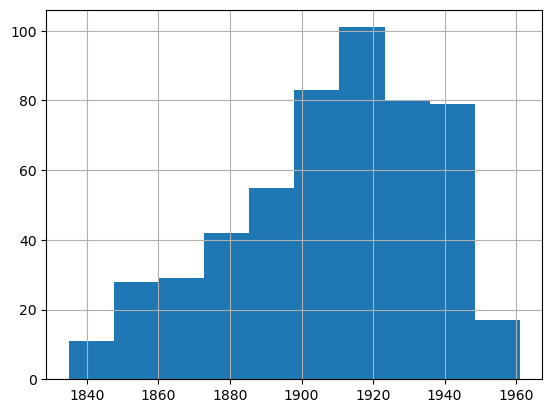

In [61]:
# 这是Pandas自带的可视化，统计直方图
winners.year_birth.hist();

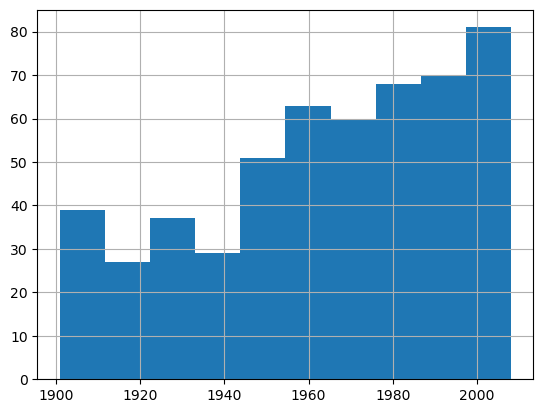

In [62]:
winners.year_prize.hist();

We can get the count values by a function called `value_counts()`.

In [63]:
# 元素值频数统计，计数
number_of_winners_per_year = winners.year_prize.value_counts()
number_of_winners_per_year.head()

year_prize
1988    9
2008    9
2000    9
2001    9
2002    9
Name: count, dtype: int64

### Boxplots

In statistical analysis, it can be informative to look at the ***spread*** of variables.

 * The green line shows the median value.
 * The box covers 50 % of the data points.
 * Whiskers represent the minimum and maximum values.

55.0
55.0
25
88
47.0
64.0


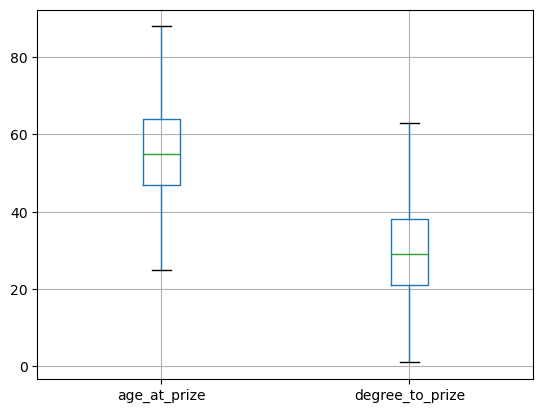

In [64]:
# Pandas自带的盒图
winners[['age_at_prize', 'degree_to_prize']].boxplot();
print(winners.age_at_prize.median()) # 中位数
print(winners.age_at_prize.quantile()) # 50% quantile
print(winners.age_at_prize.min())
print(winners.age_at_prize.max())
print(winners.age_at_prize.quantile(0.25)) # 25% quantile
print(winners.age_at_prize.quantile(0.75))

### Combining datasets

In [65]:
ser1 = pd.Series(['A', 'B', 'C'])
ser2 = pd.Series(['D', 'E', 'F'])

In [66]:
ser1

0    A
1    B
2    C
dtype: object

In [67]:
ser2

0    D
1    E
2    F
dtype: object

In [68]:
# 扩展数据，连接数据，组合数据，连接Series，连接DataFrame，组合表
# 默认是axis=0，这里挺奇怪的，由于没有设置index，所以这里只能通过iloc来进行访问。并且index的显示是重复的。
temp = pd.concat([ser1, ser2])
temp, temp.iloc[3]

(0    A
 1    B
 2    C
 0    D
 1    E
 2    F
 dtype: object,
 'D')

In [69]:
pd.concat([ser1, ser2], axis=1) # 注意这里，自动添加了行和列的indexes，但是并不是字符串

,0,1
0,A,D
1,B,E
2,C,F


But `pd.concat` preserves indices, and as it can be seen, we can get duplicated indices. 

Other solutions to the indexing issue.

- `ignore_index=True`: ignores the indices in the original data and creates new indices
- Multi-index keys: enables for hierarchical indexing while preserving the original indexing

In [70]:
# 解决重复index的问题。
ser1 = pd.Series(['A', 'B', 'C'])
ser2 = pd.Series(['D', 'E', 'F'])
pd.concat([ser1, ser2], ignore_index=True)

0    A
1    B
2    C
3    D
4    E
5    F
dtype: object

In [71]:
# multi-indexing 多重索引，保留原来的索引，多重键值
ser1 = pd.Series(['A', 'B', 'C'])
ser2 = pd.Series(['D', 'E', 'F'])
multi_ind_df = pd.concat([ser1, ser2], keys=['ser1', 'ser2'])
print(multi_ind_df)

ser1  0    A
      1    B
      2    C
ser2  0    D
      1    E
      2    F
dtype: object


In [72]:
multi_ind_df['ser1']

0    A
1    B
2    C
dtype: object

How to deal with missing columns:

- `join='outer'`: This makes sure that all the columns that are unique to both DataFrames are present in the result. If a column exists in one DataFrame but not in the other, it will be included in the result with NaN values in its corresponding columns.
- `join='inner'`: This includes only the columns or indices that are common to all the DataFrames being concatenated.   

注意下这里的outer 模式，表示两个表中的独特的值都将包含在新的表中，缺省值用None填充。  
inner则表示只取两个表中的相同的值，放在新的表中。  
outer:并集  
inner:交集  
处理列索引和行索引不一致的情况。

In [73]:
import pandas as pd
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    
    return pd.DataFrame(data, ind) # example DataFrame

In [74]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5);
print(df6);

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [75]:
print(pd.concat([df5, df6])) # 连接两个表，组合两个表

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [76]:
print(pd.concat([df5, df6], join='outer')) # 连接两个表，组合两个表

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [77]:
print('1:\n', pd.concat([df5, df6], join='inner')) # 连接两个表，组合两个表
print('2:\n', pd.concat([df5, df6], join='inner', axis=0))
print('3:\n', pd.concat([df5, df6], join='inner', axis=1)) # 这个的结果是空，因为在行上，两个表没有index的交集

1:
     B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4
2:
     B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4
3:
 Empty DataFrame
Columns: [A, B, C, B, C, D]
Index: []


### Merging operations
组合表，也就是根据行或者列的index将表进行组合。合并和连接之间的区别看后面。    
Merging allows us to join data frames based on a common column or index

One-to-one joins

In [78]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                        'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                        'hire_date': [2004, 2008, 2012, 2014]})

In [79]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [80]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [81]:
df3 = pd.merge(df1, df2)
print(df3)
# how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
df3 = pd.merge(df1, df2, how='inner')
print(df3)
'''
on: label or list
Column or index level names to join on. These must be found in both DataFrames. 
If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.
当没有指定on的时候，没有指定根据那一列进行合并的时候，默认会根据公有的列名进行合并
'''
df4 = pd.merge(df1, df2, on='employee') # 指定根据某一列进行合并
print(df4)

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [83]:
print(pd.concat([df1, df2], join='outer')) # 连接两个表，组合两个表
# 连接表的时候，只会进行简单的连接，并不会对重复的index进行处理，而merge的时候会根据index进行去重。

  employee        group  hire_date
0      Bob   Accounting        NaN
1     Jake  Engineering        NaN
2     Lisa  Engineering        NaN
3      Sue           HR        NaN
0     Lisa          NaN     2004.0
1      Bob          NaN     2008.0
2     Jake          NaN     2012.0
3      Sue          NaN     2014.0


Many-to-one joins

In [84]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

In [85]:
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [86]:
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [87]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


Many-to-many joins

In [ ]:
# 多对多匹配，也就是做个笛卡尔积。注意只有单个列标签同时出现在两个表中时适用。如果存在多个相同的列标签，就需要看看了
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                                         'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                                      'spreadsheets', 'organization']})

In [ ]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [ ]:
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [ ]:
df6 = pd.merge(df1,df5)
print(df6)

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


可以看看groupby()，实现了merge的逆操作